re-doing these plots with new data from TESS, in prep for APO observations in 2023!

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.optimize import curve_fit
import exoplanet as xo
import lightkurve as lk

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [3]:
period_orig = 6.005 # previously published

In [4]:
lk.search_lightcurve('TIC326815804')


#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 17,2019,QLP,1800,326815804,0.0
1,TESS Sector 18,2019,SPOC,120,326815804,0.0
2,TESS Sector 18,2019,TESS-SPOC,1800,326815804,0.0
3,TESS Sector 18,2019,QLP,1800,326815804,0.0
4,TESS Sector 24,2020,SPOC,120,326815804,0.0
5,TESS Sector 24,2020,TESS-SPOC,1800,326815804,0.0
6,TESS Sector 24,2020,QLP,1800,326815804,0.0
7,TESS Sector 57,2022,SPOC,120,326815804,0.0
8,TESS Sector 57,2022,TESS-SPOC,200,326815804,0.0


In [119]:
lc1 = lk.search_lightcurve('TIC326815804',author='QLP').download_all();
lc2 = lk.search_lightcurve('TIC326815804',author='SPOC').download_all();
lc3 = lk.search_lightcurve('TIC326815804',author='TESS-SPOC').download_all();

In [163]:
# QLP data
# for k in lc1:
#     k.plot()
#     plt.ylim(.97,1.02)

In [164]:
# SPOC data
# for k in lc2:
#     k.plot()

In [126]:
# lc3[-1].normalize()

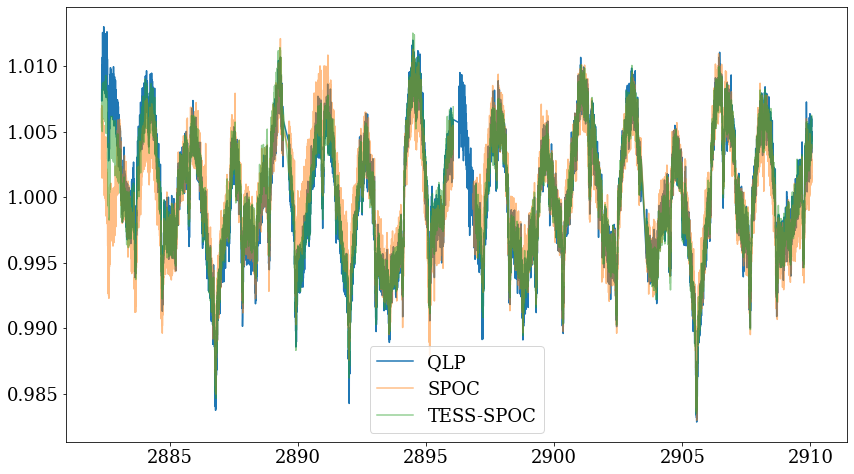

In [129]:
plt.figure(figsize=(14,8))
plt.plot(lc1[-1].time.value, lc1[-1].flux.value, label='QLP')
plt.plot(lc2[-1].time.value, lc2[-1].normalize()['flux'], alpha=0.5, label='SPOC')
plt.plot(lc3[-1].time.value, lc3[-1].normalize()['flux'], alpha=0.5, label='TESS-SPOC')
plt.legend()

(2895.0, 2900.0)

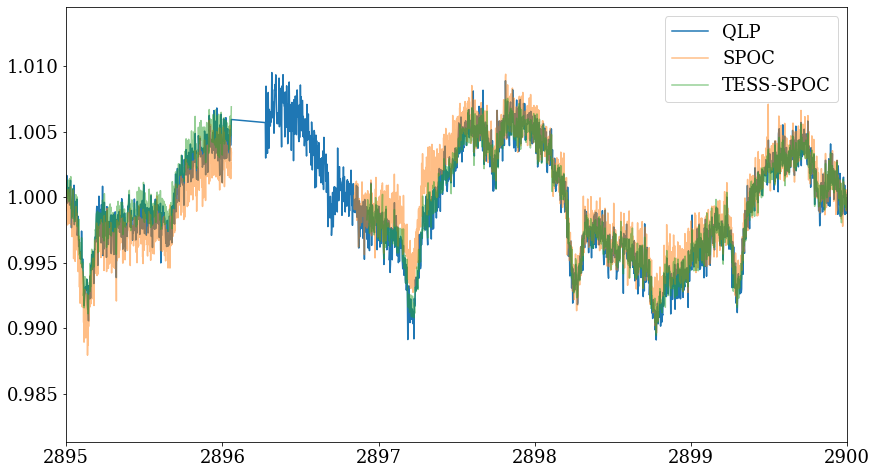

In [130]:
plt.figure(figsize=(14,8))
plt.plot(lc1[-1].time.value, lc1[-1].flux.value, label='QLP')
plt.plot(lc2[-1].time.value, lc2[-1].normalize()['flux'], alpha=0.5, label='SPOC')
plt.plot(lc3[-1].time.value, lc3[-1].normalize()['flux'], alpha=0.5, label='TESS-SPOC')
plt.legend()
plt.xlim(2895,2900)

(2882.0, 2887.0)

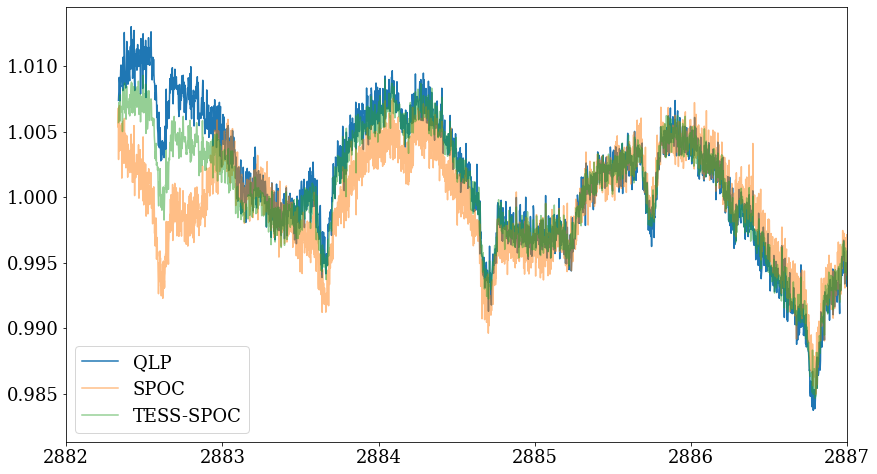

In [131]:
plt.figure(figsize=(14,8))
plt.plot(lc1[-1].time.value, lc1[-1].flux.value, label='QLP')
plt.plot(lc2[-1].time.value, lc2[-1].normalize()['flux'], alpha=0.5, label='SPOC')
plt.plot(lc3[-1].time.value, lc3[-1].normalize()['flux'], alpha=0.5, label='TESS-SPOC')
plt.legend()
plt.xlim(2882,2887)

In [94]:
# this combines all the QLP data, which includes Sector 17 but is long cadence in 18 & 24
time_all = np.array([], dtype=float)
flux_all = np.array([], dtype=float)
qual_all = np.array([], dtype='int32')

for k in range(len(lc1)):
    time_all = np.append(time_all, lc1[k].time.value)
    flux_all = np.append(flux_all, lc1[k].flux.value)
    qual_all = np.append(qual_all, lc1[k].quality.value)

print(len(time_all))

25936


In [132]:
lk.search_lightcurve('TIC326815804')

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 17,2019,QLP,1800,326815804,0.0
1,TESS Sector 18,2019,SPOC,120,326815804,0.0
2,TESS Sector 18,2019,TESS-SPOC,1800,326815804,0.0
3,TESS Sector 18,2019,QLP,1800,326815804,0.0
4,TESS Sector 24,2020,SPOC,120,326815804,0.0
5,TESS Sector 24,2020,TESS-SPOC,1800,326815804,0.0
6,TESS Sector 24,2020,QLP,1800,326815804,0.0
7,TESS Sector 57,2022,SPOC,120,326815804,0.0
8,TESS Sector 57,2022,TESS-SPOC,200,326815804,0.0


In [149]:
# this way gets a combo of data!
time_all = np.array([], dtype=float)
flux_all = np.array([], dtype=float)
qual_all = np.array([], dtype='int32')

# Sector 17: QLP
time_all = np.append(time_all, lc1[0].time.value)
flux_all = np.append(flux_all, lc1[0].flux.value)
qual_all = np.append(qual_all, lc1[0].quality.value)

# Sectors 18 & 24: SPOC
for k in range(0,2):
    time_all = np.append(time_all, lc2[k].time.value)
    flux_all = np.append(flux_all, lc2[k].normalize()['flux'])
    qual_all = np.append(qual_all, lc2[k].quality.value)

# Sectors 57 & 58: SPOC - we tried TESS-SPOC, and its OK too, but keep it consistent w/ 18 & 24
for k in range(2,len(lc2)):
    time_all = np.append(time_all, lc2[k].time.value)
    flux_all = np.append(flux_all, lc2[k].normalize()['flux'])
    qual_all = np.append(qual_all, lc2[k].quality.value)
    
print(len(time_all))

xok = np.where((qual_all == 0) & np.isfinite(time_all) & np.isfinite(flux_all))[0]
print(len(xok))

73256
68547


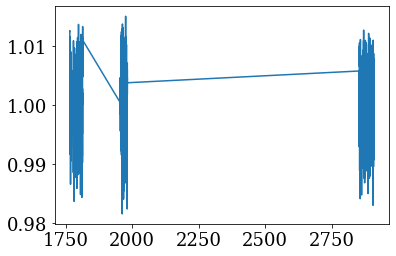

In [150]:
plt.plot(time_all[xok], flux_all[xok])

In [151]:
# This is the new dominant power in the system, coming from starspots?

frequency, power = xo.estimators.LombScargle(time_all[xok], flux_all[xok]).autopower()
new_P = 1./frequency[np.argmax(power)]
print(new_P)

1.7173898187808332


In [152]:
# this is the new eclipse signal
fsup = 1/np.arange(1, 1.1, 0.00001)
psup = xo.estimators.LombScargle(time_all[xok], flux_all[xok]).power(fsup)

period_p = 1./fsup[np.argmax(psup)]
print(period_p)

1.0428100000002805


In [246]:
print(period_orig / new_P) # is this a 7:2 period ratio?
# 1/3.5

3.4965853030751752


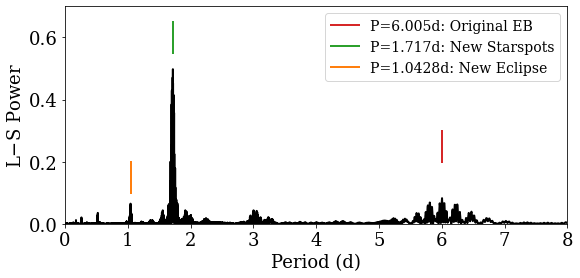

In [185]:
plt.figure(figsize=(9,4))
plt.plot(1./frequency, power, lw=2, c='k')

plt.xlim(0, 8)
plt.ylim(0,0.7)
plt.xlabel('Period (d)')
plt.ylabel('L$-$S Power')

# plt.plot([period_orig, period_orig], [0.2,0.3], c='C3')

# plt.text(5, 0.33, 'Original EB Period', fontsize=14, color='r')
plt.plot([period_orig, period_orig], [0.2,0.3],lw=2, c='C3', label='P=6.005d: Original EB ')
plt.plot([new_P, new_P], [0.55,0.65], c='C2', lw=2,label='P=1.717d: New Starspots')
plt.plot([period_p, period_p], [0.1,0.2], c='C1', lw=2,label='P=1.0428d: New Eclipse')

plt.legend(fontsize=14)

plt.savefig('LS_2023.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

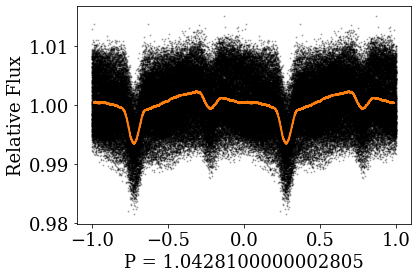

In [186]:
phz1 = np.hstack(((time_all[xok] % period_p)/period_p-1, (time_all[xok] % period_p)/period_p))
pfl1 = np.tile(flux_all[xok]/np.nanmedian(flux_all[xok]), 2)

ss1 = np.argsort(phz1)
psmo1 = pd.Series(pfl1[ss1]).rolling(2000, center=True).median()

ind1 = np.hstack((np.arange(len(time_all[xok])), np.arange(len(time_all[xok]))))
out1 = np.where((phz1[ss1] >= -0.5) & (phz1[ss1] < 0.5))[0]
sout1 = np.argsort(ind1[ss1][out1])

plt.scatter(phz1, pfl1, s=1, alpha=0.25, c='k')
plt.plot(phz1[ss1], psmo1, c='C1', lw=2)
plt.xlabel('P = '+str(period_p))
plt.ylabel('Relative Flux')
plt.savefig('P1_2023.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

# now reconstruct the time light curve...
model1 = psmo1[out1].values[sout1] - 1

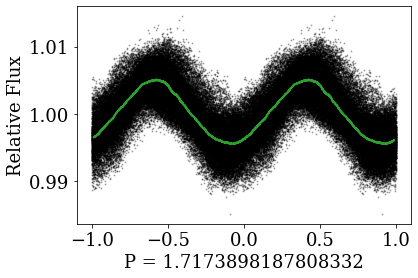

In [189]:
phz2 = np.hstack(((time_all[xok] % new_P)/new_P-1, (time_all[xok] % new_P)/new_P))
pfl2 = np.tile(flux_all[xok]/np.nanmedian(flux_all[xok]) - model1, 2)

ss2 = np.argsort(phz2)
psmo2 = pd.Series(pfl2[ss2]).rolling(2000, center=True).median()

ind2 = np.hstack((np.arange(len(time_all[xok])), np.arange(len(time_all[xok]))))
out2 = np.where((phz2[ss2] >= -0.5) & (phz2[ss2] < 0.5))[0]
sout2 = np.argsort(ind2[ss2][out2])

plt.scatter(phz2, pfl2, s=1, alpha=0.25, c='k')
plt.plot(phz2[ss2], psmo2, c='C2', lw=2)
plt.xlabel('P = '+str(new_P))
plt.ylabel('Relative Flux')
plt.savefig('P2_2023.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

model2 = psmo2[out2].values[sout2] - 1

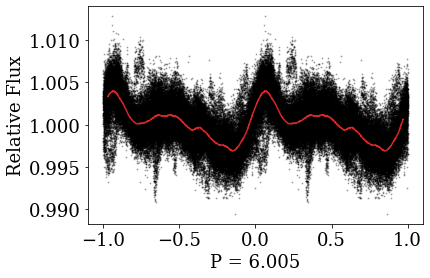

In [191]:
phz3 = np.hstack(((time_all[xok] % period_orig)/period_orig-1, (time_all[xok] % period_orig)/period_orig))
pfl3 = np.tile(flux_all[xok]/np.nanmedian(flux_all[xok]) - model1 - model2, 2)

ss3 = np.argsort(phz3)
psmo3 = pd.Series(pfl3[ss3]).rolling(4000, center=True).median()

ind3 = np.hstack((np.arange(len(time_all[xok])), np.arange(len(time_all[xok]))))
out3 = np.where((phz3[ss3] >= -0.5) & (phz3[ss3] < 0.5))[0]
sout3 = np.argsort(ind3[ss3][out3])

plt.scatter(phz3, pfl3, s=1, alpha=0.25, c='k')
plt.plot(phz3[ss3], psmo3, c='C3')
plt.xlabel('P = '+str(period_orig))
plt.ylabel('Relative Flux')
plt.savefig('P3_2023.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

model3 = psmo3[out3].values[sout3] - 1

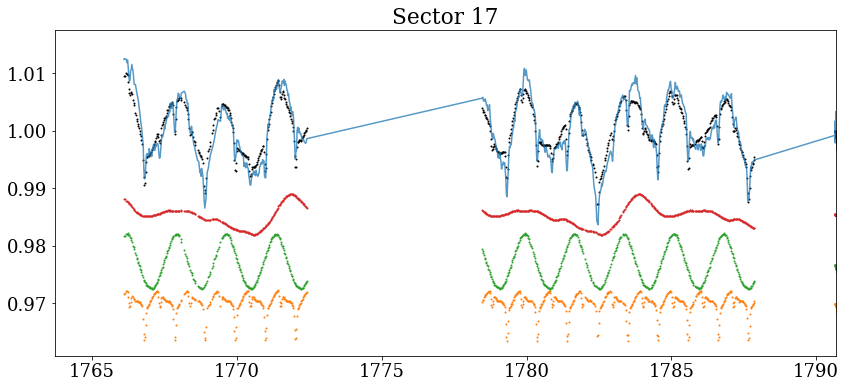

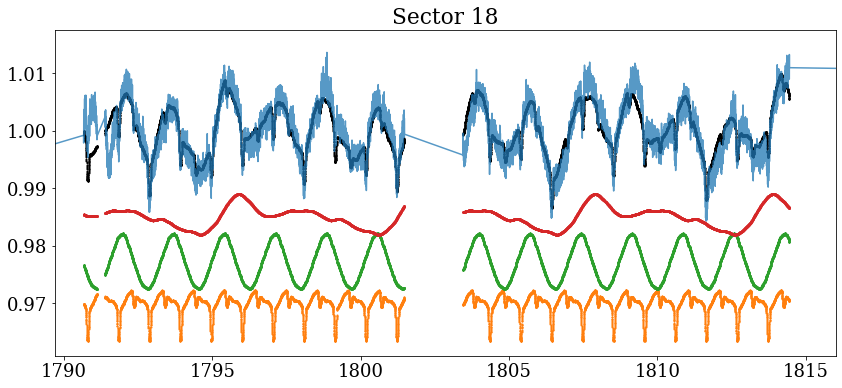

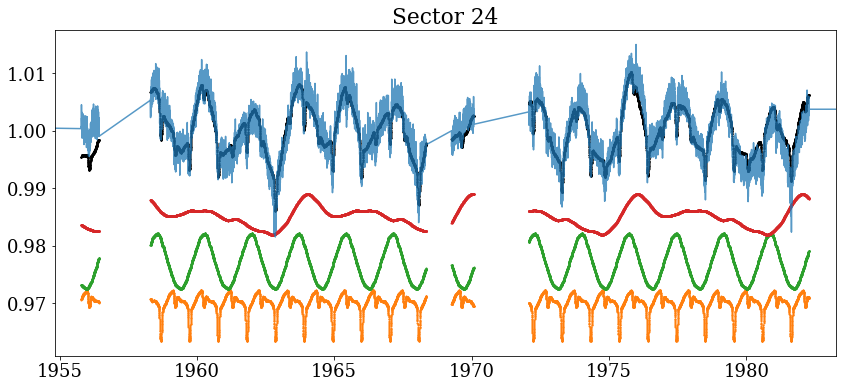

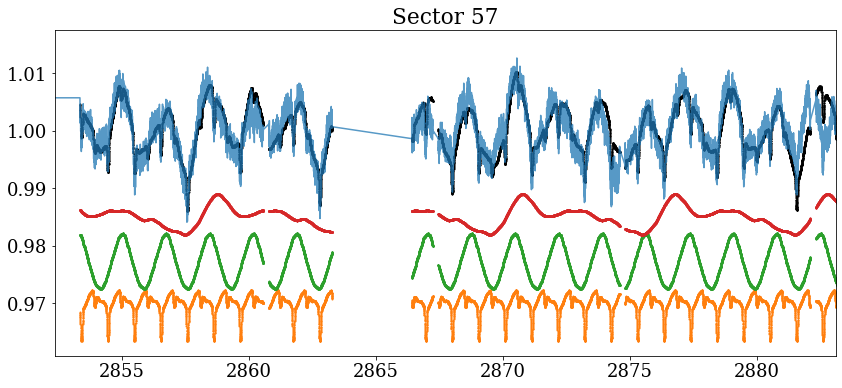

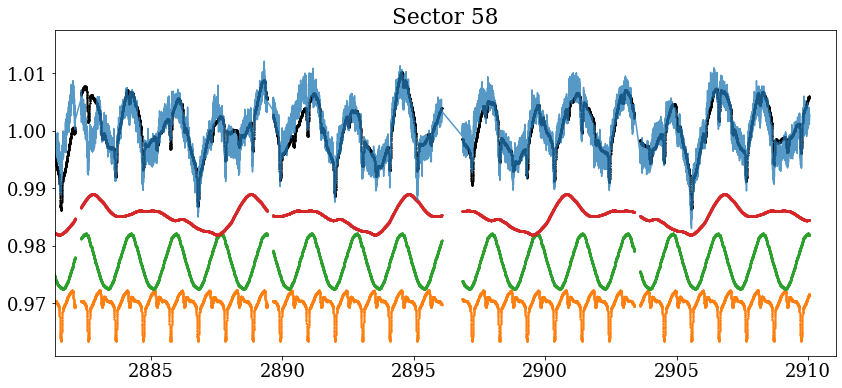

In [160]:
for k in range(len(lc1)):
    plt.figure(figsize=(14,6))
    plt.plot(time_all[xok], flux_all[xok]/np.nanmedian(flux_all[xok]), alpha=0.75)
    
    plt.scatter(time_all[xok], model1 + model2 + model3+1, c='k', s=1)
    
    plt.scatter(time_all[xok], model1 + .97, c='C1', s=1)
    plt.scatter(time_all[xok], model2 + .977, c='C2', s=1)
    plt.scatter(time_all[xok], model3 + .985, c='C3', s=1)

    plt.xlim(min(lc1[k].time.value)-1, max(lc1[k].time.value)+1)
    
    plt.title('Sector '+str(lc1[k].sector))
    plt.savefig('Sector '+str(lc1[k].sector)+'_2023.png', dpi=150, bbox_inches='tight', pad_inches=0.25)
   

## interesting Q's to ask....
- [x] can we improve the orignal Period? (maybe!)
- [x] does the signal change over time at the orignal period (i.e. can we still measure the evolution?)
- [x] can we iteratively fit the models to improve them?

6.003819999997963


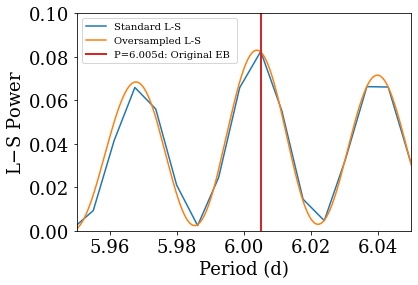

In [253]:
# can we improve the original Period...?
fsup2 = 1/np.arange(5.95, 6.05, 0.00001)[::-1]
psup2 = xo.estimators.LombScargle(time_all[xok], flux_all[xok]).power(fsup2)

old_P2 = 1./fsup2[np.argmax(psup2)]
print(old_P2)

plt.plot(1./frequency, power, label='Standard L-S')
plt.plot(1./fsup2, psup2, label='Oversampled L-S')
plt.xlim(1/fsup2[-1], 1/fsup2[0])
plt.ylim(0,0.1)
plt.plot([period_orig, period_orig], [0.,0.3],lw=2, c='C3', label='P=6.005d: Original EB ')

plt.xlabel('Period (d)')
plt.ylabel('L$-$S Power')

plt.legend(fontsize=10)

plt.savefig('LS_2023b.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

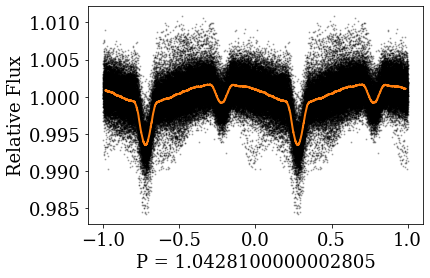

In [198]:
# can we do another iteration on the models, using the v1 from above, to get better median shapes?

phz1 = np.hstack(((time_all[xok] % period_p)/period_p-1, (time_all[xok] % period_p)/period_p))
pfl1 = np.tile(flux_all[xok]/np.nanmedian(flux_all[xok]) - model2 - model3, 2)

ss1 = np.argsort(phz1)
psmo1 = pd.Series(pfl1[ss1]).rolling(2000, center=True).median()

ind1 = np.hstack((np.arange(len(time_all[xok])), np.arange(len(time_all[xok]))))
out1 = np.where((phz1[ss1] >= -0.5) & (phz1[ss1] < 0.5))[0]
sout1 = np.argsort(ind1[ss1][out1])

plt.scatter(phz1, pfl1, s=1, alpha=0.25, c='k')
plt.plot(phz1[ss1], psmo1, c='C1', lw=2)
plt.xlabel('P = '+str(period_p))
plt.ylabel('Relative Flux')
plt.savefig('P1b_2023.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

model1b = psmo1[out1].values[sout1] - 1

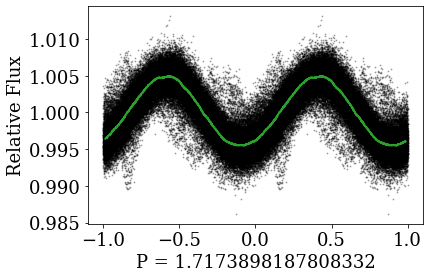

In [199]:
phz2 = np.hstack(((time_all[xok] % new_P)/new_P-1, (time_all[xok] % new_P)/new_P))
pfl2 = np.tile(flux_all[xok]/np.nanmedian(flux_all[xok]) - model1b - model3, 2)

ss2 = np.argsort(phz2)
psmo2 = pd.Series(pfl2[ss2]).rolling(2000, center=True).median()

ind2 = np.hstack((np.arange(len(time_all[xok])), np.arange(len(time_all[xok]))))
out2 = np.where((phz2[ss2] >= -0.5) & (phz2[ss2] < 0.5))[0]
sout2 = np.argsort(ind2[ss2][out2])

plt.scatter(phz2, pfl2, s=1, alpha=0.25, c='k')
plt.plot(phz2[ss2], psmo2, c='C2', lw=2)
plt.xlabel('P = '+str(new_P))
plt.ylabel('Relative Flux')
plt.savefig('P2b_2023.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

model2b = psmo2[out2].values[sout2] - 1

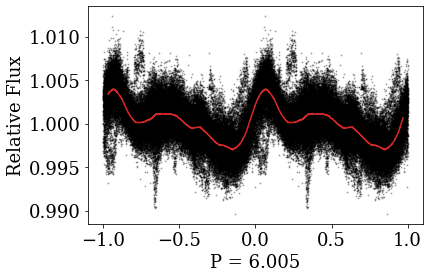

In [200]:
phz3 = np.hstack(((time_all[xok] % period_orig)/period_orig-1, (time_all[xok] % period_orig)/period_orig))
pfl3 = np.tile(flux_all[xok]/np.nanmedian(flux_all[xok]) - model1b - model2b, 2)

ss3 = np.argsort(phz3)
psmo3 = pd.Series(pfl3[ss3]).rolling(4000, center=True).median()

ind3 = np.hstack((np.arange(len(time_all[xok])), np.arange(len(time_all[xok]))))
out3 = np.where((phz3[ss3] >= -0.5) & (phz3[ss3] < 0.5))[0]
sout3 = np.argsort(ind3[ss3][out3])

plt.scatter(phz3, pfl3, s=1, alpha=0.25, c='k')
plt.plot(phz3[ss3], psmo3, c='C3')
plt.xlabel('P = '+str(period_orig))
plt.ylabel('Relative Flux')
plt.savefig('P3b_2023.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

model3b = psmo3[out3].values[sout3] - 1

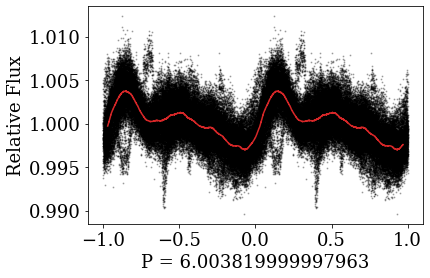

In [201]:
# does the "new old" period do a better job? marginally?

phz3 = np.hstack(((time_all[xok] % old_P2)/old_P2-1, (time_all[xok] % old_P2)/old_P2))
pfl3 = np.tile(flux_all[xok]/np.nanmedian(flux_all[xok]) - model1b - model2b, 2)

ss3 = np.argsort(phz3)
psmo3 = pd.Series(pfl3[ss3]).rolling(4000, center=True).median()

ind3 = np.hstack((np.arange(len(time_all[xok])), np.arange(len(time_all[xok]))))
out3 = np.where((phz3[ss3] >= -0.5) & (phz3[ss3] < 0.5))[0]
sout3 = np.argsort(ind3[ss3][out3])

plt.scatter(phz3, pfl3, s=1, alpha=0.25, c='k')
plt.plot(phz3[ss3], psmo3, c='C3')
plt.xlabel('P = '+str(old_P2))
plt.ylabel('Relative Flux')

model3b_new = psmo3[out3].values[sout3] - 1
# plt.savefig('P3_2023.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

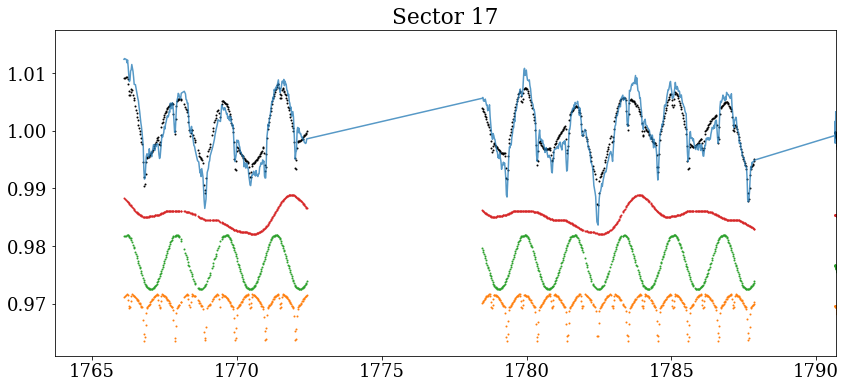

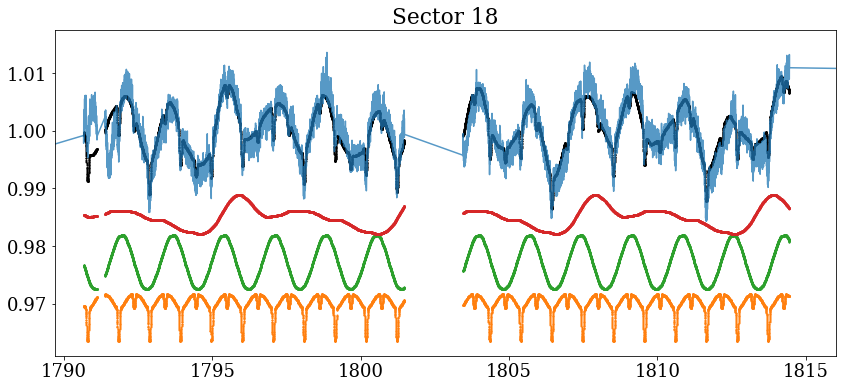

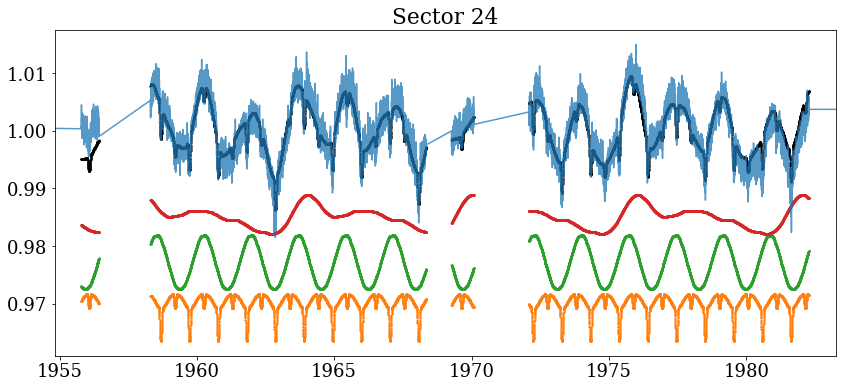

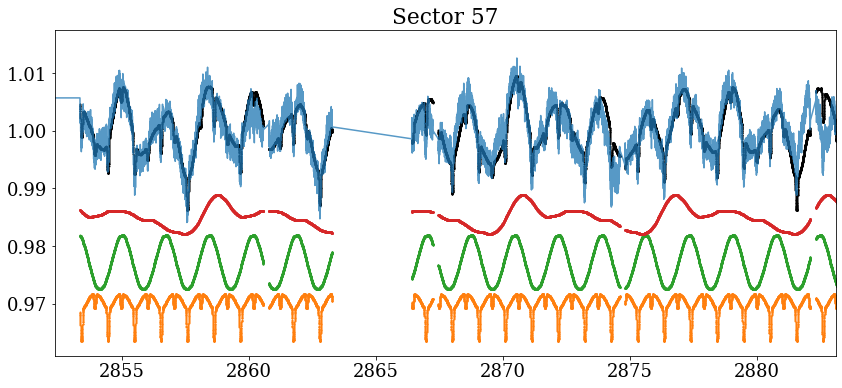

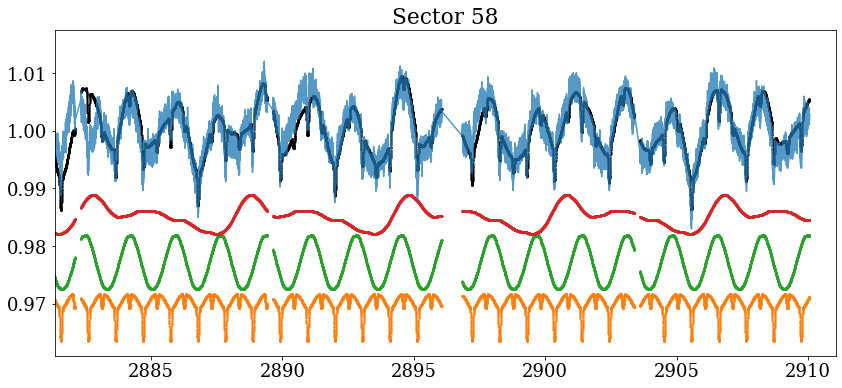

In [250]:
for k in range(len(lc1)):
    plt.figure(figsize=(14,6))
    plt.plot(time_all[xok], flux_all[xok]/np.nanmedian(flux_all[xok]), alpha=0.75)
    
    plt.scatter(time_all[xok], model1b + model2b + model3b+1, c='k', s=1)
    
    plt.scatter(time_all[xok], model1b + .97, c='C1', s=1)
    plt.scatter(time_all[xok], model2b + .977, c='C2', s=1)
    plt.scatter(time_all[xok], model3b + .985, c='C3', s=1)

    plt.xlim(min(lc1[k].time.value)-1, max(lc1[k].time.value)+1)
    
    plt.title('Sector '+str(lc1[k].sector))
    plt.savefig('Sector '+str(lc1[k].sector)+'_2023b.png', dpi=150, bbox_inches='tight', pad_inches=0.25)
   

0.006983724862984264
0.0054680700588920494
1886.4655990856845 2882.5536212329853


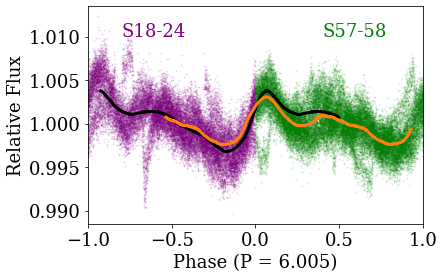

In [249]:
# do we see any change in the old QX Cas (P=6d) shape over time?

ksize = 4500
ptouse = period_orig
# ptouse = old_P2 

x1 = np.where((time_all[xok] > 1790) & (time_all[xok] < 2000))[0]
x2 = np.where((time_all[xok] > 2000))[0]

phz3x1 = np.hstack(((time_all[xok][x1] % ptouse)/ptouse-1, (time_all[xok][x1] % ptouse)/ptouse))
pfl3x1 = np.tile(flux_all[xok][x1]/np.nanmedian(flux_all[xok][x1]) - model1b[x1] - model2b[x1], 2)

ss3x1 = np.argsort(phz3x1)
psmo3x1 = pd.Series(pfl3x1[ss3x1]).rolling(ksize, center=True).median()

phz3x2 = np.hstack(((time_all[xok][x2] % ptouse)/ptouse-1, (time_all[xok][x2] % ptouse)/ptouse))
pfl3x2 = np.tile(flux_all[xok][x2]/np.nanmedian(flux_all[xok][x2]) - model1b[x2] - model2b[x2], 2)

ss3x2 = np.argsort(phz3x2)
psmo3x2 = pd.Series(pfl3x2[ss3x2]).rolling(ksize, center=True).median()


plt.scatter(phz3x1-1, pfl3x1, s=1, alpha=0.1, c='purple')
plt.plot(phz3x1[ss3x1][0:-17000], psmo3x1[0:-17000], c='k', lw=3)

plt.scatter(phz3x2+1, pfl3x2, s=1, alpha=0.1, c='green')
plt.plot(phz3x2[ss3x2][17000:], psmo3x2[17000:], c='C1', lw=3)

plt.xlabel('Phase (P = '+str(ptouse)+')')
plt.ylabel('Relative Flux')

plt.text(-0.8, 1.01, 'S18-24', color='purple')
plt.text(0.4, 1.01, 'S57-58', color='green')

plt.xlim(-1,1)

# plt.savefig('overtime1.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

print(np.nanmax(psmo3x1) - np.nanmin(psmo3x1))
print(np.nanmax(psmo3x2) - np.nanmin(psmo3x2))
print(np.nanmean(time_all[xok][x1]), np.nanmean(time_all[xok][x2]))


In [243]:
# with ksize = 4500

# using original period
# 0.006983724862984264
# 0.0054680700588920494

# using new old period
# 0.006954549491152262
# 0.005469409487742771

# so... difference is in 3rd decimal, nbd

In [244]:
# with ksize = 2500

# 0.008198319260206532
# 0.0059106910565980275

# 0.008108014505269212
# 0.005915486566940187